In [26]:
import pandas as pd
import numpy as np

Import data

In [27]:
df = pd.read_csv('../dat/CreditCardFraud_updated.csv')
# dimensions of the data
print(df.shape)

(786363, 30)


1.  Perform preliminary data quality checks, such as identifying duplicated columns and columns with entirely missing data. Determine how to manage these issues and justify your approach for handling them.

In [28]:
# find columns with missing values
missing = df.isnull().sum()
missing
df = df.dropna(axis = 1, how = 'all')
# remove the first column, which is the index
df = df.iloc[:, 1:]

We can see that there are 6 columns with totally empty columns (NaN), including columns `echoBuffer`, `merchantCity`, `merchantState`, `merchantZip`, `posOnPremises`, and `recurringAuthInd`. We can drop these columns as they do not provide any useful information.

In [29]:
# find duplicate rows or columns
df.duplicated().sum()
df.columns.duplicated().sum()

0

No duplicated columns or rows are found.

2. Pay close attention to outliers in numerical variables. Describe the methods you use for detecting outliers and explain your chosen approach for handling them. Justify your decisions and explain the potential impact of outliers on the analysis.

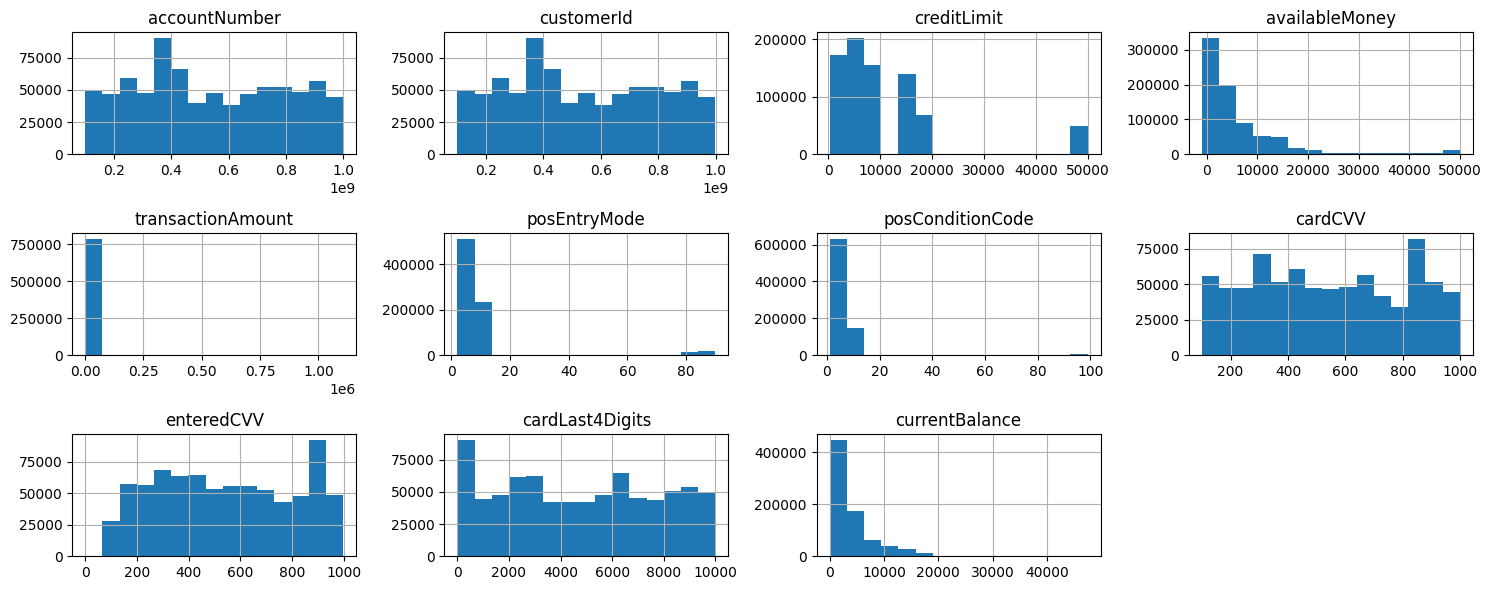

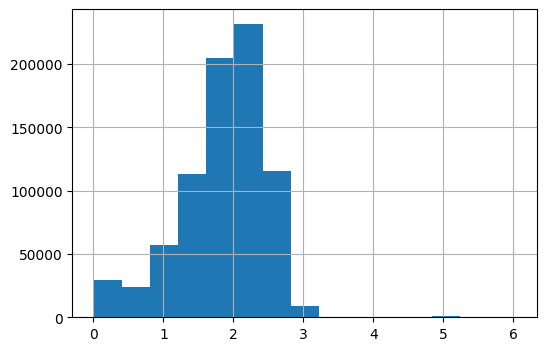

cardCVV               0
enteredCVV            8
cardLast4Digits    5578
dtype: int64

In [30]:
# find numerical columns
numerical = df.select_dtypes(include=[np.number])
numerical.columns
df_numerical = df[numerical.columns]

# plot histograms of numerical columns
import matplotlib.pyplot as plt
df_numerical.hist(bins=15, figsize=(15, 6), layout=(3, 4))
plt.tight_layout()
plt.show()
# plot histograms of transactionAmount log-transformed
temp = np.log10(df['transactionAmount']+1)
temp.hist(bins=15, figsize=(6, 4))
plt.show()

# see summary statistics of numerical columns
df_numerical.describe()

# see columns: cardCVV, enteredCVV, and cardLast4Digits. count the number of 0s in each column
df[['cardCVV', 'enteredCVV', 'cardLast4Digits']].apply(lambda x: (x == 0).sum())

-   Most of items has `transactionAmount` below 1000. For those above 1000 (about 3e3 of them out of about 7e6 items), we investigate the proportion of them with `isFraud = True`, the proportion is similar to the population, so we remove these outliers.
-   There might be some outliers in `posEntryMode` and `posConditionCode` but since it's just an indicator number, and we don't have any information about the meaning of the number, we keep it as it is.
-   For `cardLast4Digits` it should range from 0000 to 9999 uniformly but we notice there's a abnormal proportion of 0000, but the proportion is not that high so we keep it as it is.

In [34]:
#  abnormal `transactionAmount` values, see their 'isFraud' values
df[df['transactionAmount'] > 110]['isFraud'].value_counts()
df = df[df['transactionAmount'] < 1100]

3. Identify columns with missing values and determine how to manage them. Justify your approach and reasoning for handling missing values in the dataset.

In [ ]:
df.describe()

## see columns with missing values
missing = df.isnull().sum()
missing

4. Investigate the time variables in the dataset and address any potential issues that may arise when working with them. This may involve converting the variables to a suitable format, conducting additional cleaning, and/or extracting meaningful features to ensure consistency and usability in the analysis. Justify your approach and reasoning for handling time variables, explaining how your decisions enhance the overall data quality and interpretation.

5. Certain columns in the dataset may require special treatment during data wrangling due to their unique characteristics (e.g., `cardCVV`, `enteredCVV`, `cardLast4Digits`). Explore alternative methods for integrating these variables into your analysis, and document any decisions made during this stage.

6. Analyze the relationship between the columns `cardCVV`, `enteredCVV`, and `cardLast4Digits` and the target variable, `isFraud`, using an appropriate visualization (such as a grouped bar chart). Discuss the insights gained about the relationship between these variables and credit card fraud.

7. Visualize the distribution of `transactionAmount` using an appropriate plot, such as a histogram or density plot. Provide a brief analysis of the observed pattern and discuss any insights or trends you can infer from the visualization.

8. Investigate the relationship between `isFraud` and categorical predictors, such as `merchantCategoryCode`, `posEntryMode`, `transactionType`, `posConditionCode`, and `merchantCountryCode`, by creating suitable visualizations like bar charts to display the fraud rate for each category. Describe the patterns you observe and their potential implications for creating a predictive model for fraudulent transactions.

9. Further explore the relationship between `isFraud` and `transactionType` conditioned on `merchantCategoryCode` by generating a grouped bar chart or another suitable visualization to display the fraudulent rates by merchant category code and transaction type. Share any additional insights you have.

10. Construct conditional probability density plots (or other suitable visualizations) for the numerical variables in the dataset to help understand the relationships between these variables and the target variable, `isFraud`. Identify any patterns or trends suggesting a relationship between the numerical variables and fraudulent transactions.

11. Programmatically identify multi-swipe transactions by defining specific conditions under which they occur (e.g., same amount, within a short time span, etc.). Clearly state the conditions you have chosen for this analysis. Estimate the percentage of multi-swipe transactions and the percentage of the total dollar amount for these transactions, excluding the first "normal" transaction from the count. Discuss any interesting findings or patterns that emerge from your analysis of multi-swipe transactions and their conditions.

12. Examine the class imbalance in the `isFraud` outcome variable and discuss the potential implications of these patterns for the development of a predictive model for credit card fraud detection. Note that at this stage, we are not building or training a predictive model. Instead, our objective is to gain a deeper understanding of the class imbalance issue in the data and explore ways to address it.

16. Implement a method of your choice to mitigate class imbalance in the isFraud outcome variable. Describe the method you used and report its effects on the class distribution. How might addressing class imbalance impact the effectiveness and performance of a predictive model for credit card fraud detection?